<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Read_images_from_local_directory_and_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_data_dir="/content/drive/My Drive/PetImages/train"
validation_data_dir="/content/drive/My Drive/PetImages/validation"
img_width=28
img_height=28
batch_size=20

In [0]:
datagen=ImageDataGenerator(rescale=1.0/255)

In [0]:
train_data_gen=datagen.flow_from_directory(train_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['cat','dog'],
                                           class_mode='binary')
validation_data_gen=datagen.flow_from_directory(validation_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['cat','dog'],
                                           class_mode='binary')

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

In [0]:
train_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
model=Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(3,3))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 526,337
Trainable params: 526,337
Non-trainable params: 0
__________________________________________________

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model.fit_generator(train_data_gen,steps_per_epoch=len(train_data_gen),epochs=5,validation_data=validation_data_gen
                            ,validation_steps=len(validation_data_gen))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
13/13 [==============================] - 226s 17s/step - loss: 0.7473 - accuracy: 0.5225 - val_loss: 0.7280 - val_accuracy: 0.5000
Epoch 2/5
13/13 [==============================] - 2s 187ms/step - loss: 0.6955 - accuracy: 0.5425 - val_loss: 0.7014 - val_accuracy: 0.5150
Epoch 3/5
13/13 [==============================] - 2s 184ms/step - loss: 0.6806 - accuracy: 0.5500 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 4/5
13/13 [==============================] - 2s 187ms/step - loss: 0.6457 - accuracy: 0.6550 - val_loss: 0.6697 - val_accuracy: 0.5800
Epoch 5/5
13/13 [==============================] - 2s 183ms/step - loss: 0.6233 - accuracy: 0.6825 - val_loss: 0.6581 - val_accuracy: 0.5900


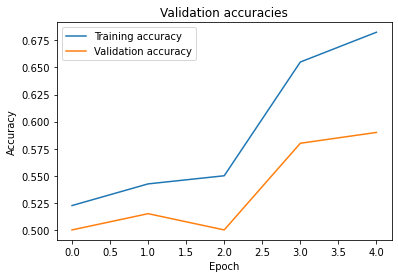

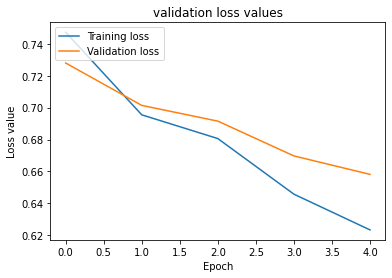

In [0]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [0]:
from tensorflow.keras.preprocessing import image

array([0])

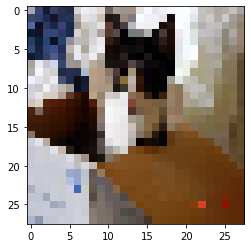

In [0]:
img=image.load_img("/content/drive/My Drive/PetImages/validation/cat/cat.200.jpg",target_size=(img_width,img_height))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0
img = np.expand_dims(img, axis=0)
img_class = np.argmax(model.predict(img),axis=1)
img_class